## 라이브러리 import 

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

## 데이터 로드

In [155]:
raw_data = pd.read_csv('/content/datasets/Samsung.csv')
print(raw_data)

            Date     Open     High      Low    Close     Adj Close      Volume
0     2000-01-04   6000.0   6110.0   5660.0   6110.0   4740.119629  74195000.0
1     2000-01-05   5800.0   6060.0   5520.0   5580.0   4328.947754  74680000.0
2     2000-01-06   5750.0   5780.0   5580.0   5620.0   4359.979492  54390000.0
3     2000-01-07   5560.0   5670.0   5360.0   5540.0   4297.916992  40305000.0
4     2000-01-10   5600.0   5770.0   5580.0   5770.0   4476.349121  46880000.0
...          ...      ...      ...      ...      ...           ...         ...
5385  2021-06-07  82700.0  82800.0  81600.0  81900.0  81900.000000  16496197.0
5386  2021-06-08  82300.0  82600.0  81800.0  81900.0  81900.000000  12781226.0
5387  2021-06-09  81500.0  82000.0  81100.0  81100.0  81100.000000  14908823.0
5388  2021-06-10  81300.0  81400.0  80900.0  81000.0  81000.000000  17586995.0
5389  2021-06-11  81200.0  81700.0  80700.0  81000.0  81000.000000  14087962.0

[5390 rows x 7 columns]


In [156]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5390 non-null   object 
 1   Open       5384 non-null   float64
 2   High       5384 non-null   float64
 3   Low        5384 non-null   float64
 4   Close      5384 non-null   float64
 5   Adj Close  5384 non-null   float64
 6   Volume     5384 non-null   float64
dtypes: float64(6), object(1)
memory usage: 294.9+ KB
None


## 데이터 전처리

In [157]:
# Date column을 datetime 타입으로 변환 후 인덱스로 사용
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data)

               Open     High      Low    Close     Adj Close      Volume
Date                                                                    
2000-01-04   6000.0   6110.0   5660.0   6110.0   4740.119629  74195000.0
2000-01-05   5800.0   6060.0   5520.0   5580.0   4328.947754  74680000.0
2000-01-06   5750.0   5780.0   5580.0   5620.0   4359.979492  54390000.0
2000-01-07   5560.0   5670.0   5360.0   5540.0   4297.916992  40305000.0
2000-01-10   5600.0   5770.0   5580.0   5770.0   4476.349121  46880000.0
...             ...      ...      ...      ...           ...         ...
2021-06-07  82700.0  82800.0  81600.0  81900.0  81900.000000  16496197.0
2021-06-08  82300.0  82600.0  81800.0  81900.0  81900.000000  12781226.0
2021-06-09  81500.0  82000.0  81100.0  81100.0  81100.000000  14908823.0
2021-06-10  81300.0  81400.0  80900.0  81000.0  81000.000000  17586995.0
2021-06-11  81200.0  81700.0  80700.0  81000.0  81000.000000  14087962.0

[5390 rows x 6 columns]


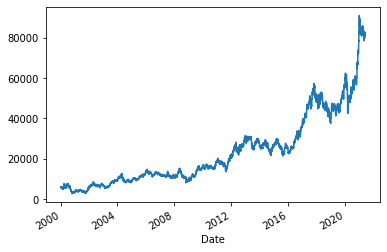

In [158]:
# 시간에 따른 종가
raw_data['Close'].plot()
plt.show()

In [159]:
# 날짜로 인덱싱해 구간에 해당하는 종가 변수에 저장
data = raw_data['2019-06-15':'2020-06-14'][['Close']]
print(data)
print(data.info())

              Close
Date               
2019-06-17  43900.0
2019-06-18  44350.0
2019-06-19  45350.0
2019-06-20  45500.0
2019-06-21  45700.0
...             ...
2020-06-08  54900.0
2020-06-09  55500.0
2020-06-10  55400.0
2020-06-11  54300.0
2020-06-12  52300.0

[246 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2019-06-17 to 2020-06-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   245 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None


### 결측치 제거

In [160]:
# 종가 결측치 제거
data.dropna(subset=['Close'], inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2019-06-17 to 2020-06-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   245 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None


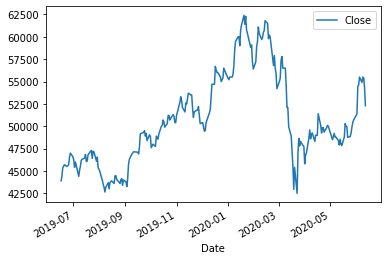

In [161]:
# 1년동안 시간에 따른 종가
data.plot()
plt.show()

### minmax scaling

In [162]:
from sklearn.preprocessing import MinMaxScaler

In [163]:
# 0에서 1 사이의 값으로 스케일링
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data)
print(scaled_data[:6])
print(scaled_data.shape)

[[0.07035176]
 [0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]]
(245, 1)


**RNN(순환 신경망) - 입력과 출력을 시퀀스 단위로 처리**

### feature, target 시퀀스화

In [164]:
# 각 길이가 28인 시퀀스로 만듦
sequence_X = []
sequence_Y = []
for i in range(len(scaled_data) - 28):
    _x = scaled_data[i:i+28] # i ~ i+27번째가 feature
    _y = scaled_data[i+28] # i+28번째가 label
    if i is 0:
        print(_x, '->', _y)
    sequence_X.append(_x)
    sequence_Y.append(_y)

[[0.07035176]
 [0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]
 [0.15577889]
 [0.16080402]
 [0.20100503]
 [0.22613065]
 [0.20603015]
 [0.18844221]
 [0.14572864]
 [0.1758794 ]
 [0.15829146]
 [0.09547739]
 [0.13065327]
 [0.15326633]
 [0.18592965]
 [0.19095477]
 [0.19849246]
 [0.21859296]
 [0.17839196]
 [0.18090452]
 [0.2160804 ]
 [0.2361809 ]
 [0.24120603]
 [0.1959799 ]] -> [0.1959799]


In [165]:
# ndarray 타입으로 변환
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[1])
print(sequence_Y[1])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]
 [0.15577889]
 [0.16080402]
 [0.20100503]
 [0.22613065]
 [0.20603015]
 [0.18844221]
 [0.14572864]
 [0.1758794 ]
 [0.15829146]
 [0.09547739]
 [0.13065327]
 [0.15326633]
 [0.18592965]
 [0.19095477]
 [0.19849246]
 [0.21859296]
 [0.17839196]
 [0.18090452]
 [0.2160804 ]
 [0.2361809 ]
 [0.24120603]
 [0.1959799 ]
 [0.2361809 ]]
[0.2361809]
(217, 28, 1)
(217, 1)


## train, test 분리

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size=0.2
)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(173, 28, 1)
(173, 1)
(44, 28, 1)
(44, 1)


## 모델 생성

**RNN은 시퀀스의 길이가 길어질수록 성능이 떨어지기 때문에 보다 발전한 LSTM 사용**

In [168]:
model = Sequential()
model.add(LSTM(50,
               input_shape=(X_train.shape[1], X_train.shape[2]),  # input_shape=(28, 1)
               activation='tanh',  # LSTM에서 사용
               ))  
model.add(Flatten())
model.add(Dense(1))  # 값 예측이기 때문에 activation 사용 없이 값을 그대로 반환
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                10400     
_________________________________________________________________
flatten_4 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [169]:
fit_hist = model.fit(X_train, Y_train, epochs=500, validation_data=(X_test, Y_test), shuffle=False) # validation_data는 학습에 영향 x

Epoch 1/500
6/6 [==============================] - 2s 80ms/step - loss: 0.3194 - val_loss: 0.1336
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1596 - val_loss: 0.0511
Epoch 3/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0484 - val_loss: 0.0174
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0315 - val_loss: 0.0287
Epoch 5/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0240 - val_loss: 0.0132
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0203 - val_loss: 0.0133
Epoch 7/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0196 - val_loss: 0.0117
Epoch 8/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0156 - val_loss: 0.0116
Epoch 9/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0149 - val_loss: 0.0114
Epoch 10/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0141 - val_loss: 0.0096
Epoch 11/500
6/6 [=

## 결과 확인

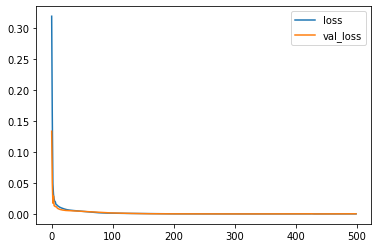

In [170]:
# test, train loss 비교
plt.plot(fit_hist.history['loss'], label='loss')
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [171]:
predict = model.predict(X_test)

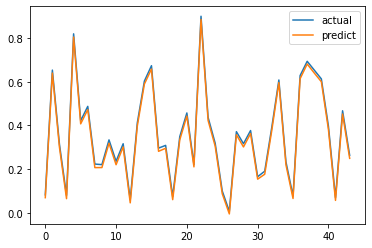

In [172]:
# test, predict 결과 값 비교
plt.plot(Y_test, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()